In [40]:
import sys
import os

import spotipy
import json
import pprint
import pandas as pd
import configparser
import seaborn as sns
import matplotlib.pyplot as plt


import spotipy.oauth2 as oauth2
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [41]:
#Authenticate with config file and spotipy client_id, client_secret, username, values

config = configparser.ConfigParser()
config.read('config_ernflerberg.cfg')
client_id = config.get('SPOTIFY', 'CLIENT_ID')
client_secret = config.get('SPOTIFY', 'CLIENT_SECRET')
username = config.get('SPOTIFY', 'USERNAME')


auth = oauth2.SpotifyClientCredentials(
    client_id=client_id,
    client_secret=client_secret
)

token = auth.get_access_token()
spotify = spotipy.Spotify(auth=token)

In [42]:
playlistDictionary={
                   "Liked": "3s3OCt230DDEIGX8xOY58A",  #like: spotify:user:ernflerberg:playlist:3s3OCt230DDEIGX8xOY58A
                   "Dislike": "7I2vgcXF2DBLsmC7EqahC0" #dislike: spotify:user:ernflerberg:playlist:7I2vgcXF2DBLsmC7EqahC0
                   }

In [43]:
#Pull 'Like' Playlist

uri = 'spotify:user:ernflerberg:playlist:3s3OCt230DDEIGX8xOY58A'
username = username

liked_playlist_id = "3s3OCt230DDEIGX8xOY58A"
liked_results = spotify.user_playlist(username, liked_playlist_id)


#Pull 'Dislike' Playlist

uri = 'spotify:user:ernflerberg:playlist:7I2vgcXF2DBLsmC7EqahC0'
username = username


disliked_playlist_id = "7I2vgcXF2DBLsmC7EqahC0" #add the last part of the playlist url here. https://open.spotify.com/user/ernflerberg/playlist/67hGWrUlSHm47BmDWPHIZD?si=6ygnOWyCTMajdAY3vFM5BA

disliked_results = spotify.user_playlist(username, disliked_playlist_id)


In [44]:
#Check that the 'Liked' playlist connects to a song
liked_results['tracks']['items'][0]['track']['id']

'48aeM2uXRzERwpVreuDfgx'

In [45]:
#Check that the 'Disliked' playlist connects to a song
disliked_results['tracks']['items'][0]['track']['id']

'2fYcpbTFptY9uRcaY56NRu'

In [46]:
#Pull the 'Liked' playlist track information using the Spotipy API JSON 
ldf = []
for i in liked_results['tracks']['items']:
    ldf.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
ldf = pd.DataFrame(ldf)  
#Add column names for the "Liked" Playlist
ldf.columns = ['song_id','added_at','artist','album','duration_ms','songname','popularity']
#Add column "user_preference" to the Liked Playlist
ldf['user_preference'] = 1
ldf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference
0,48aeM2uXRzERwpVreuDfgx,2019-05-16T03:45:34Z,Box Car Racer,Box Car Racer,195706,All Systems Go,42,1
1,2rMiNAGtsJsZ7LZH1YMSSA,2019-05-16T03:45:34Z,American Hi-Fi,The Art Of Losing,204567,The Art Of Losing,31,1
2,1pU1mucfoUalVw9apwnDhh,2019-05-16T03:45:34Z,Box Car Racer,Box Car Racer,196093,Letters To God,47,1
3,7JAg3hNqZVTE4vCVPl6cFu,2019-05-16T03:45:34Z,The Urge,Master Of Styles,223026,Jump Right In,37,1
4,4paJ10JPNCyOaLtz2cY928,2019-05-16T03:45:34Z,Sublime,Jah Won't Pay The Bills,188085,Badfish,58,1


In [47]:
#Pull the 'Disiked' playlist track information using the Spotipy API JSON
ddf = []
for i in disliked_results['tracks']['items']:
    ddf.append([i['track']['id'],
               i['added_at'], 
         i['track']['album']['artists'][0]['name'],
         i['track']['album']['name'],
         i['track']['duration_ms'],
         i['track']['name'],
         i['track']['popularity']])
ddf = pd.DataFrame(ddf)  
#Add column names for the "Disliked" Playlist
ddf.columns = ['song_id','added_at','artist','album','duration_ms','songname','popularity']
#Add column "user_preference" to the Disliked Playlist
ddf['user_preference'] = 0
ddf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference
0,2fYcpbTFptY9uRcaY56NRu,2019-05-16T03:56:31Z,Fazer,Nadi,338926,Lina,50,0
1,0KRjJtrKMJRngSPr4jp1Dl,2019-05-16T03:56:31Z,Wes Montgomery,The Incredible Jazz Guitar (Keepnews Collection),293320,In Your Own Sweet Way,13,0
2,3wqEq2lsXWO98kHXUvrN9C,2019-05-16T03:56:31Z,Oscar Peterson,American Songbook Essentials (Remastered 2011),214493,Stormy Weather,13,0
3,1cpANF6zMBoFoxkoIjZHjv,2019-05-16T03:56:31Z,Bill Evans,Undercurrent,324200,Skating In Central Park,62,0
4,4Tq2fWpX1nLCkMSOPkYb1Y,2019-05-16T03:56:31Z,Art Blakey & The Jazz Messengers,The Best Of Art Blakey,576173,Moanin',56,0


In [48]:
sp = spotipy.Spotify(auth=token)

In [49]:
#Pull Audio Features from Spotipy on song_id for Liked playlist
laf = []
for i in ldf.song_id:
    x = sp.audio_features(i)
    laf.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
laf = pd.DataFrame(laf)

laf.columns = ['song_id',
             'danceability',
             'energy',
              'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]

#Merge the Liked Audio Features and track information together
lpaf = pd.merge(ldf, laf, on='song_id')
lpaf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,48aeM2uXRzERwpVreuDfgx,2019-05-16T03:45:34Z,Box Car Racer,Box Car Racer,195706,All Systems Go,42,1,0.421,0.964,11,-2.927,0,0.0623,0.00601,0.001090,0.143,0.422,149.639,4
1,2rMiNAGtsJsZ7LZH1YMSSA,2019-05-16T03:45:34Z,American Hi-Fi,The Art Of Losing,204567,The Art Of Losing,31,1,0.437,0.912,7,-3.109,1,0.0446,0.00179,0.000124,0.201,0.619,168.287,4
2,1pU1mucfoUalVw9apwnDhh,2019-05-16T03:45:34Z,Box Car Racer,Box Car Racer,196093,Letters To God,47,1,0.323,0.561,7,-3.980,1,0.0422,0.42300,0.000246,0.157,0.423,106.689,4
3,7JAg3hNqZVTE4vCVPl6cFu,2019-05-16T03:45:34Z,The Urge,Master Of Styles,223026,Jump Right In,37,1,0.688,0.774,0,-4.689,0,0.0323,0.01270,0.000007,0.106,0.669,104.134,4
4,7JAg3hNqZVTE4vCVPl6cFu,2019-05-16T03:45:34Z,The Urge,Master Of Styles,223026,Jump Right In,37,1,0.688,0.774,0,-4.689,0,0.0323,0.01270,0.000007,0.106,0.669,104.134,4


In [50]:
#Pull Audio Features from Spotipy on song_id for Disliked playlist
daf = []
for i in ddf.song_id:
    x = sp.audio_features(i)
    daf.append([i,
               x[0]['danceability'],
                x[0]['energy'],
                    x[0]['key'],
                    x[0]['loudness'],
                    x[0]['mode'],
                    x[0]['speechiness'],
                    x[0]['acousticness'],
                    x[0]['instrumentalness'],
                    x[0]['liveness'],
                    x[0]['valence'],
                    x[0]['tempo'],
                    x[0]['time_signature']])
daf = pd.DataFrame(daf)

daf.columns = ['song_id',
             'danceability',
             'energy',
              'key',
              'loudness',
              'mode',
              'speechiness',
              'acousticness',
              'instrumentalness',
              'liveness',
              'valence',
              'tempo',
              'time_signature'
             ]

#Merge the Disliked Audio Features and track information together
dpaf = pd.merge(ddf, daf, on='song_id')
dpaf.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2fYcpbTFptY9uRcaY56NRu,2019-05-16T03:56:31Z,Fazer,Nadi,338926,Lina,50,0,0.475,0.2890,5,-20.482,0,0.0531,0.900,0.803,0.109,0.0889,111.487,4
1,0KRjJtrKMJRngSPr4jp1Dl,2019-05-16T03:56:31Z,Wes Montgomery,The Incredible Jazz Guitar (Keepnews Collection),293320,In Your Own Sweet Way,13,0,0.565,0.0694,3,-21.971,1,0.0451,0.992,0.907,0.110,0.0777,121.881,4
2,3wqEq2lsXWO98kHXUvrN9C,2019-05-16T03:56:31Z,Oscar Peterson,American Songbook Essentials (Remastered 2011),214493,Stormy Weather,13,0,0.617,0.3170,0,-8.488,1,0.0655,0.993,0.899,0.142,0.5550,119.084,4
3,1cpANF6zMBoFoxkoIjZHjv,2019-05-16T03:56:31Z,Bill Evans,Undercurrent,324200,Skating In Central Park,62,0,0.478,0.0294,0,-25.319,1,0.0453,0.993,0.948,0.105,0.1480,124.307,3
4,4Tq2fWpX1nLCkMSOPkYb1Y,2019-05-16T03:56:31Z,Art Blakey & The Jazz Messengers,The Best Of Art Blakey,576173,Moanin',56,0,0.614,0.2330,5,-18.964,0,0.0568,0.827,0.198,0.130,0.4480,126.256,4


In [51]:
#Join Disliked Playlist to Liked Playlist in New Data Frame
df_combined = pd.concat([lpaf, dpaf])
df_combined.head()

,song_id,added_at,artist,album,duration_ms,songname,popularity,user_preference,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,48aeM2uXRzERwpVreuDfgx,2019-05-16T03:45:34Z,Box Car Racer,Box Car Racer,195706,All Systems Go,42,1,0.421,0.964,11,-2.927,0,0.0623,0.00601,0.001090,0.143,0.422,149.639,4
1,2rMiNAGtsJsZ7LZH1YMSSA,2019-05-16T03:45:34Z,American Hi-Fi,The Art Of Losing,204567,The Art Of Losing,31,1,0.437,0.912,7,-3.109,1,0.0446,0.00179,0.000124,0.201,0.619,168.287,4
2,1pU1mucfoUalVw9apwnDhh,2019-05-16T03:45:34Z,Box Car Racer,Box Car Racer,196093,Letters To God,47,1,0.323,0.561,7,-3.980,1,0.0422,0.42300,0.000246,0.157,0.423,106.689,4
3,7JAg3hNqZVTE4vCVPl6cFu,2019-05-16T03:45:34Z,The Urge,Master Of Styles,223026,Jump Right In,37,1,0.688,0.774,0,-4.689,0,0.0323,0.01270,0.000007,0.106,0.669,104.134,4
4,7JAg3hNqZVTE4vCVPl6cFu,2019-05-16T03:45:34Z,The Urge,Master Of Styles,223026,Jump Right In,37,1,0.688,0.774,0,-4.689,0,0.0323,0.01270,0.000007,0.106,0.669,104.134,4


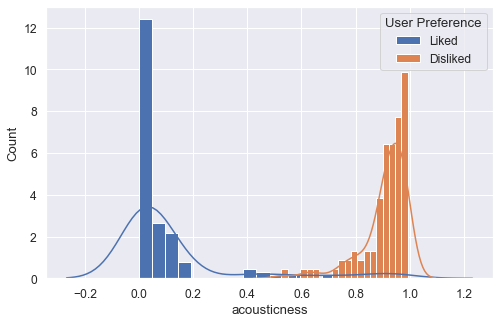

In [65]:
df_liked = df_combined[df_combined['user_preference']==1]
df_disliked = df_combined[df_combined['user_preference']==0]

sns.set(style='darkgrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(df_liked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='acousticness', ylabel='Count')
sns.distplot(df_disliked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}).set(xlabel='acousticness', ylabel='Count')
plt.legend(title='User Preference', labels=['Liked', 'Disliked'])

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'tempo')]

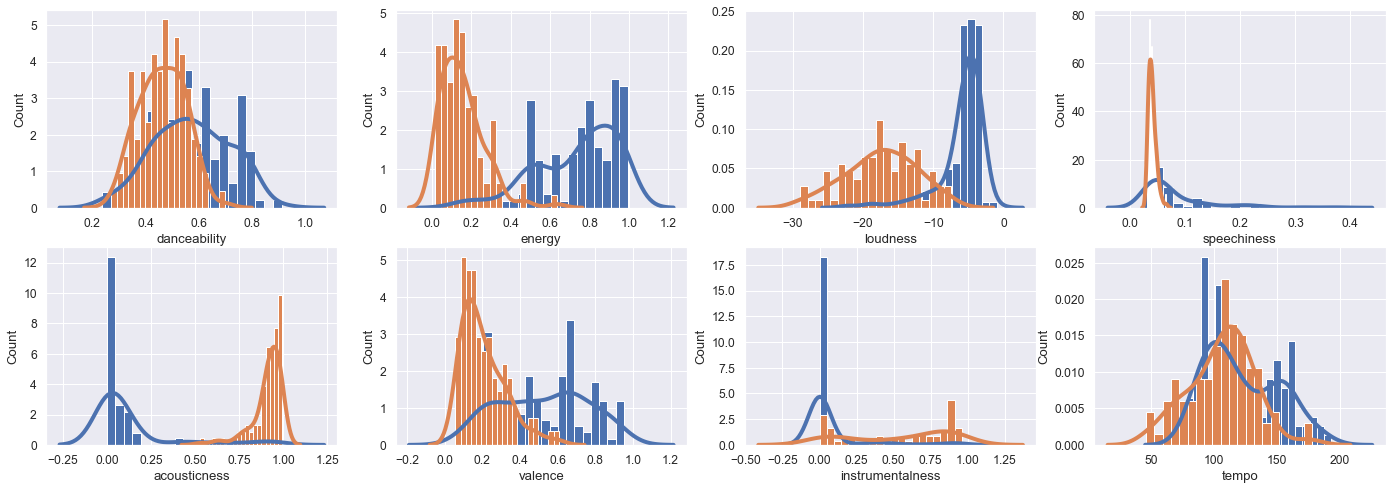

In [55]:
LikedId=playlistDictionary["Liked"]
DislikeId=playlistDictionary["Dislike"]
spotifyUsername='ernflerberg'

likedplay=sp.user_playlist(spotifyUsername, playlist_id=LikedId)
dislikeplay=sp.user_playlist(spotifyUsername, playlist_id=DislikeId)

df_liked = df_combined[df_combined['user_preference']==1]
df_disliked = df_combined[df_combined['user_preference']==0]

column=('songname', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'valence', 'instrumentalness','tempo')
playlistList=[likedplay, dislikeplay]
n_bins=20
fig, axs = plt.subplots(figsize=(24, 8), nrows=2, ncols=4)
axs=axs.flatten()

    
sns.distplot(df_liked['danceability'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[0]).set(xlabel='danceability', ylabel='Count')
sns.distplot(df_disliked['danceability'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[0]).set(xlabel='danceability', ylabel='Count')
    
sns.distplot(df_liked['energy'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[1]).set(xlabel='energy', ylabel='Count')
sns.distplot(df_disliked['energy'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[1]).set(xlabel='energy', ylabel='Count')
    
sns.distplot(df_liked['loudness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[2]).set(xlabel='loudness', ylabel='Count')
sns.distplot(df_disliked['loudness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[2]).set(xlabel='loudness', ylabel='Count')
    
sns.distplot(df_liked['speechiness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[3]).set(xlabel='speechiness', ylabel='Count')
sns.distplot(df_disliked['speechiness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[3]).set(xlabel='speechiness', ylabel='Count')
    
sns.distplot(df_liked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[4]).set(xlabel='acousticness', ylabel='Count')
sns.distplot(df_disliked['acousticness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[4]).set(xlabel='acousticness', ylabel='Count')
    
sns.distplot(df_liked['valence'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[5]).set(xlabel='valence', ylabel='Count')
sns.distplot(df_disliked['valence'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[5]).set(xlabel='valence', ylabel='Count')
    
sns.distplot(df_liked['instrumentalness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[6]).set(xlabel='instrumentalness', ylabel='Count')
sns.distplot(df_disliked['instrumentalness'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[6]).set(xlabel='instrumentalness', ylabel='Count')
    
sns.distplot(df_liked['tempo'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[7]).set(xlabel='tempo', ylabel='Count')
sns.distplot(df_disliked['tempo'], norm_hist=True, kde=True, bins=20, hist_kws={"alpha": 1}, kde_kws={'linewidth': 4}, ax=axs[7]).set(xlabel='tempo', ylabel='Count')


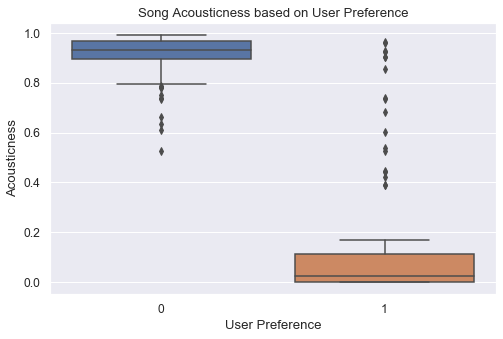

In [67]:
# plot a boxplot of acousticness for an overview
sns.boxplot(x='user_preference', y='acousticness', data=df_combined)

_ = plt.xlabel('User Preference')
_ = plt.ylabel('Acousticness')
_ = plt.title('Song Acousticness based on User Preference')

plt.show()

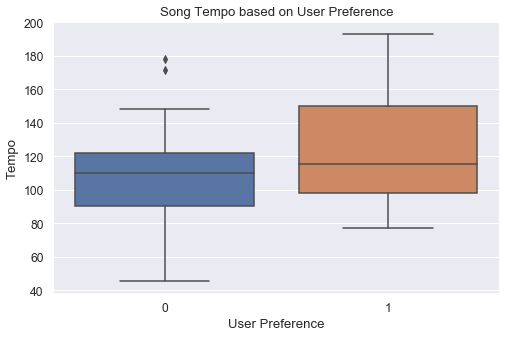

In [60]:
# plot a boxplot of tempo for an overview
sns.boxplot(x='user_preference', y='tempo', data=df_combined)

_ = plt.xlabel('User Preference')
_ = plt.ylabel('Tempo')
_ = plt.title('Song Tempo based on User Preference')

plt.show()

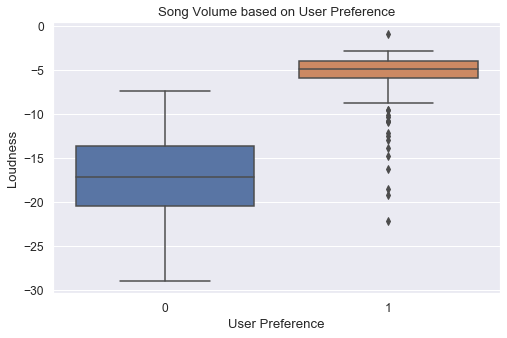

In [61]:
# plot a boxplot of tempo for an overview
sns.boxplot(x='user_preference', y='loudness', data=df_combined)

_ = plt.xlabel('User Preference')
_ = plt.ylabel('Loudness')
_ = plt.title('Song Volume based on User Preference')

plt.show()